In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

FOLDER_PATH = "/content/drive/MyDrive/Techscoop_projects/Machine_learning_model(python)/customer_churn_prediction"

# Import data

In [ ]:
train_df = pd.read_csv(f"{FOLDER_PATH}/train.csv")
test_df = pd.read_csv(f"{FOLDER_PATH}/test.csv")

# Explore

- statistics
	- shape of data
	- describe data
- missing values
- categorize values
	- categorical
	- continuous
	- discrete
- identify the shape of data
- find correlation/relationship
- find outlier

In [ ]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Data Statistics

In [ ]:
print(f"Rows: {train_df.shape[0]}")
print(f"Columns: {train_df.shape[1]}")

Rows: 4250
Columns: 20


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
non_numeric_cols = [x for x in train_df.columns if train_df[x].dtype == 'object']
print(f"Non-numeric Columns: {non_numeric_cols}")

Non-numeric Columns: ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [ ]:
train_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Missing Values

In [ ]:
train_df.isna().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


## Identify the shape of data distribution

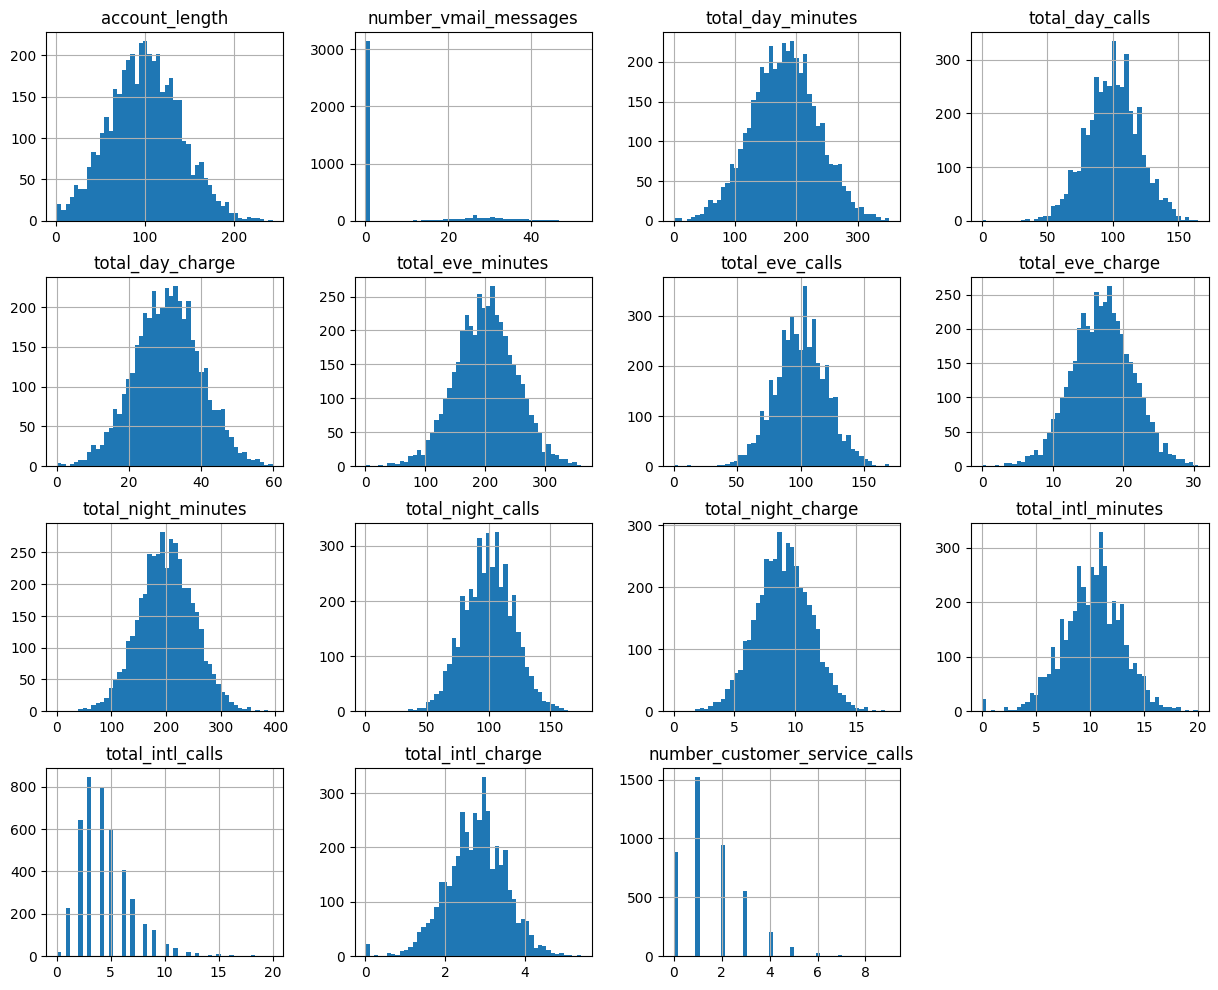

In [ ]:
train_df.hist(bins=50, figsize=(15,12))
plt.show()

In [ ]:
# a = train_df['churn'].shape
# a
# # no =a[0]
# yes = a[1]
train_df['churn'].value_counts()/train_df['churn'].shape

,count
churn,
no,0.859294
yes,0.140706


## Correlation

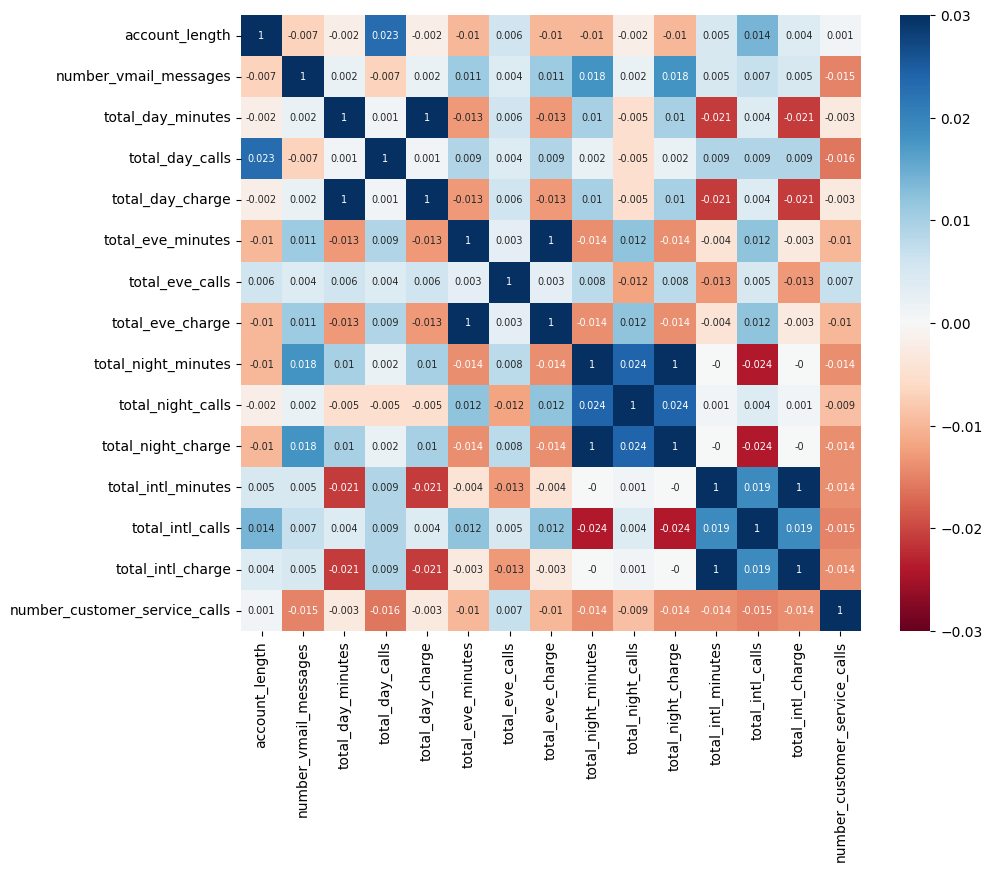

In [ ]:
numeric_col = [col for col, dtype in train_df.select_dtypes(include=['int', 'float']).items()]
plt.figure(figsize=(10,8))
correlations = train_df[numeric_col].corr()
sns.heatmap(round(correlations,3), cmap='RdBu', annot=True,
            annot_kws={"size": 7}, vmin=-0.03, vmax=0.03);

array([[<Axes: xlabel='account_length', ylabel='account_length'>,
        <Axes: xlabel='number_vmail_messages', ylabel='account_length'>,
        <Axes: xlabel='total_day_minutes', ylabel='account_length'>,
        <Axes: xlabel='total_day_charge', ylabel='account_length'>,
        <Axes: xlabel='number_customer_service_calls', ylabel='account_length'>,
        <Axes: xlabel='area_code', ylabel='account_length'>],
       [<Axes: xlabel='account_length', ylabel='number_vmail_messages'>,
        <Axes: xlabel='number_vmail_messages', ylabel='number_vmail_messages'>,
        <Axes: xlabel='total_day_minutes', ylabel='number_vmail_messages'>,
        <Axes: xlabel='total_day_charge', ylabel='number_vmail_messages'>,
        <Axes: xlabel='number_customer_service_calls', ylabel='number_vmail_messages'>,
        <Axes: xlabel='area_code', ylabel='number_vmail_messages'>],
       [<Axes: xlabel='account_length', ylabel='total_day_minutes'>,
        <Axes: xlabel='number_vmail_messages', ylab

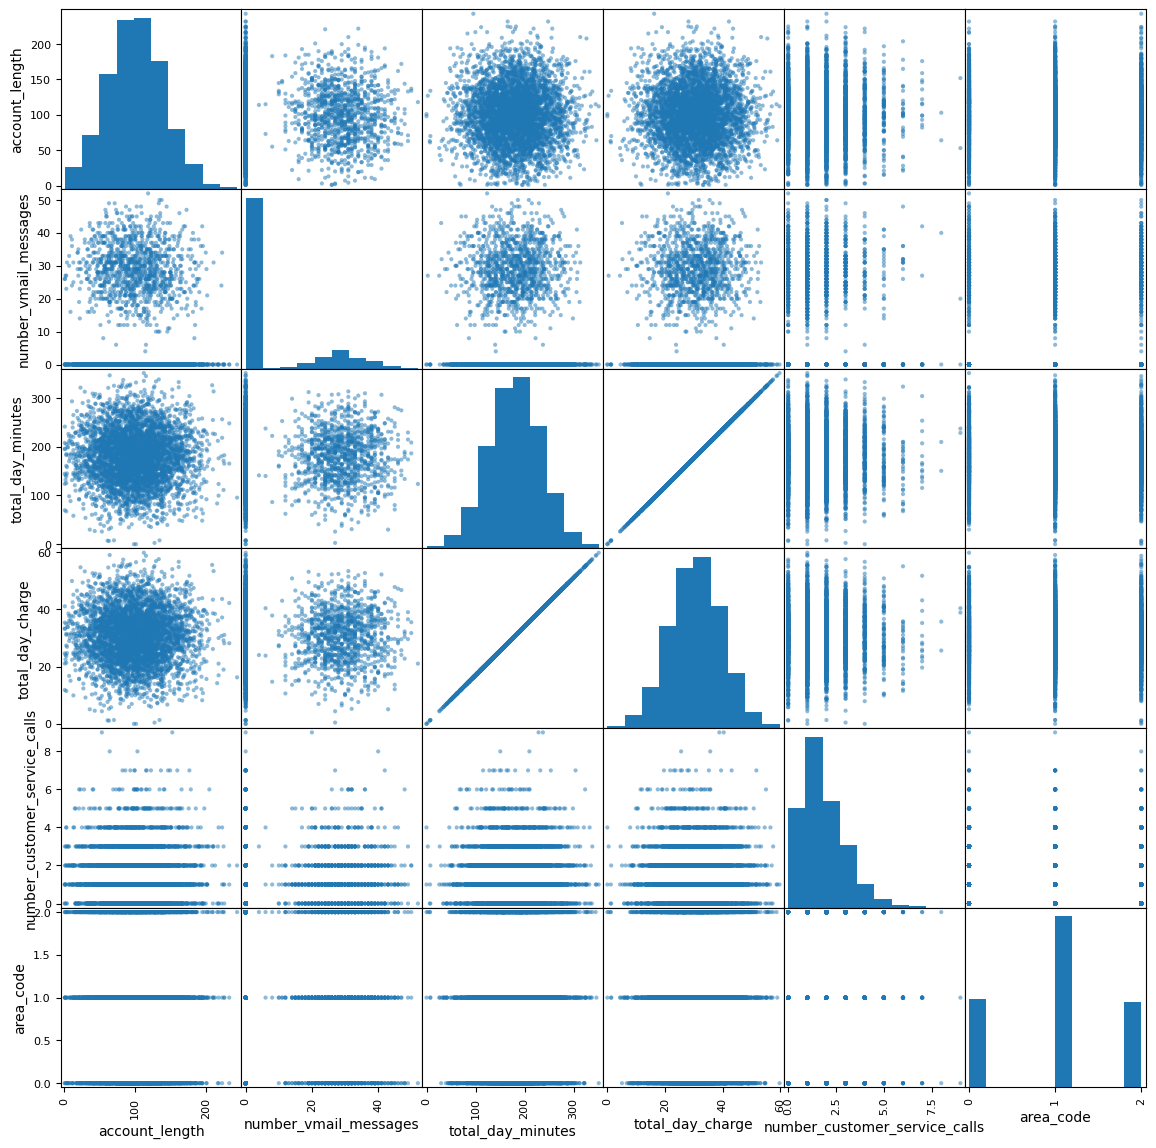

In [ ]:
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

temp_df = train_df.copy()
temp_df['area_code'] = LE.fit_transform(temp_df['area_code'])
cols = ["account_length", "number_vmail_messages", "total_day_minutes", "total_day_charge", "number_customer_service_calls", "area_code"]
scatter_matrix(temp_df[cols], figsize=(14, 14))

In [ ]:
#corr = temp_df.corr()
#corr['area_code'].sort_values(ascending=False).plot(kind="bar")

ValueError: could not convert string to float: 'OH'

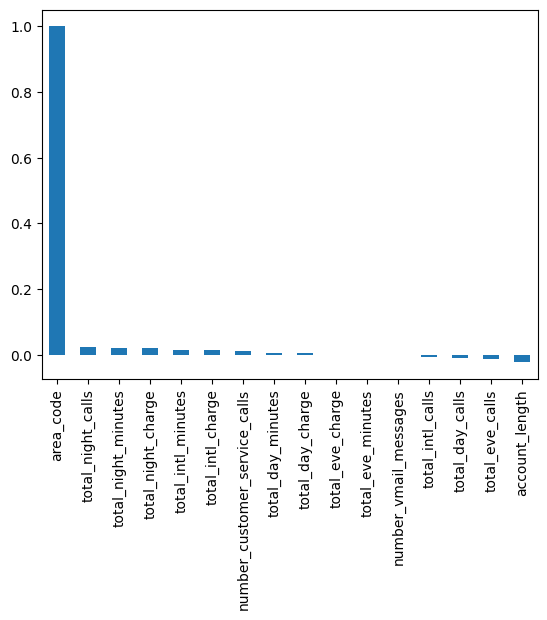

In [ ]:
# Select only numeric columns for correlation calculation
numeric_temp_df = temp_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_temp_df.corr()

# Check if 'area_code' exists in the correlation matrix before plotting
if 'area_code' in corr.columns:
    corr['area_code'].sort_values(ascending=False).plot(kind="bar")
else:
    print("Error: 'area_code' is not in the correlation matrix. Check if it's numeric.")


## Outlier

In [ ]:
Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]

# print('nums numericals columns are {}'.format(Num_cols))

In [ ]:
# Calculate Z-scores for each data point in the DataFrame
z_scores = np.abs((numeric_temp_df - numeric_temp_df.mean()) / numeric_temp_df.std())

# Define a Z-score threshold (e.g., 3)
z_score_threshold = 3

# Identify outliers using the Z-score
outliers = (z_scores > z_score_threshold)

# Print the indices of rows with outliers
print(outliers.any())


account_length                    True
area_code                        False
number_vmail_messages             True
total_day_minutes                 True
total_day_calls                   True
total_day_charge                  True
total_eve_minutes                 True
total_eve_calls                   True
total_eve_charge                  True
total_night_minutes               True
total_night_calls                 True
total_night_charge                True
total_intl_minutes                True
total_intl_calls                  True
total_intl_charge                 True
number_customer_service_calls     True
dtype: bool


In [ ]:
colours = ('#8635D5','#F24982','#F98617','#F9C823','#2DC574','#006CDC','#8635D5','#F24982','#F98617','#F9C823','#2DC574','#006CDC','#8635D5','#F24982','#F98617','#F9C823','#2DC574','#006CDC')

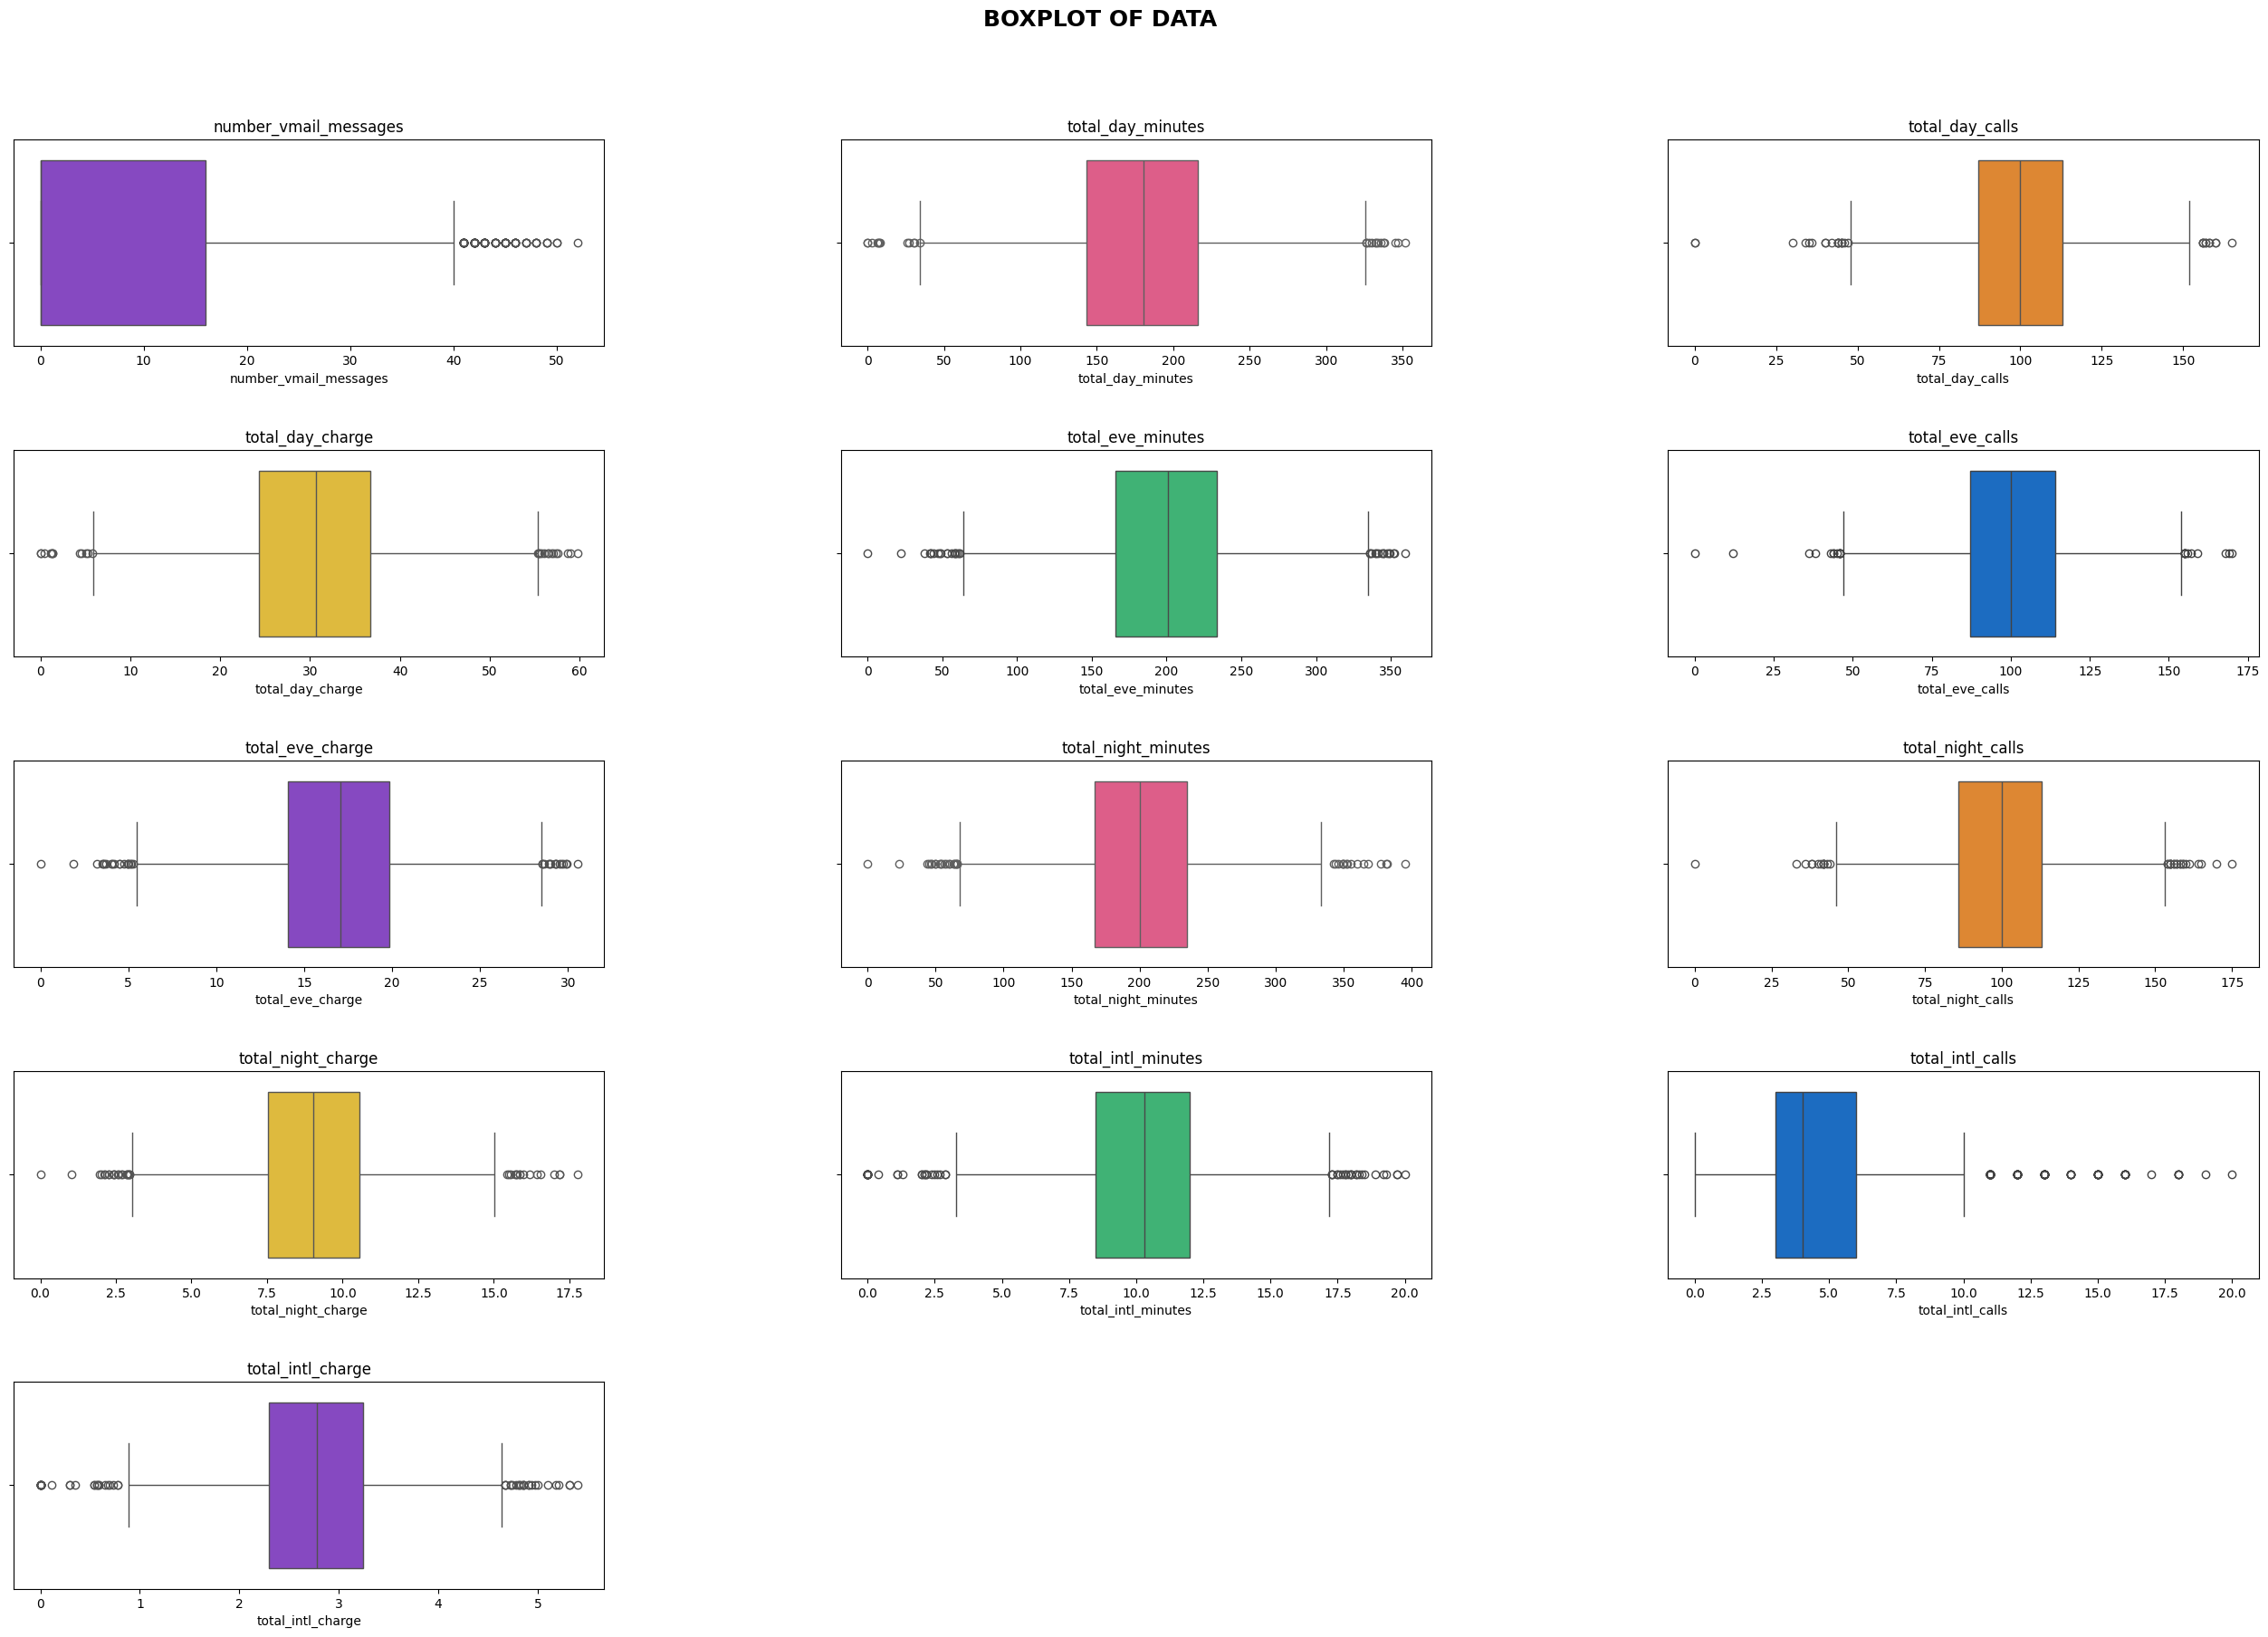

In [ ]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = train_df, x=col ,color = colours[i]);

    ax1.set_title(f'{col}', )
    ax1.set_xlabel(f'{col}',)


In [ ]:
# Finding the IQR For Budget columns
dict = {}
for col in Num_cols:
    percentile25 = train_df[col].quantile(0.25)
    percentile75 = train_df[col].quantile(0.75)
    IQR  = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit

for col in Num_cols:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(train_df[train_df[col] < dict['lower_limit_' + col]] ) , col))
    print('There are total {} Customers data which {} are more than upper limit.\n'.format(len(train_df[train_df[col] > dict['upper_limit_' + col]] ) , col))

There are total 0 Customers data which number_vmail_messages are less than lower limit.
There are total 86 Customers data which number_vmail_messages are more than upper limit.

There are total 12 Customers data which total_day_minutes are less than lower limit.
There are total 13 Customers data which total_day_minutes are more than upper limit.

There are total 18 Customers data which total_day_calls are less than lower limit.
There are total 10 Customers data which total_day_calls are more than upper limit.

There are total 12 Customers data which total_day_charge are less than lower limit.
There are total 14 Customers data which total_day_charge are more than upper limit.

There are total 19 Customers data which total_eve_minutes are less than lower limit.
There are total 15 Customers data which total_eve_minutes are more than upper limit.

There are total 13 Customers data which total_eve_calls are less than lower limit.
There are total 11 Customers data which total_eve_calls are m

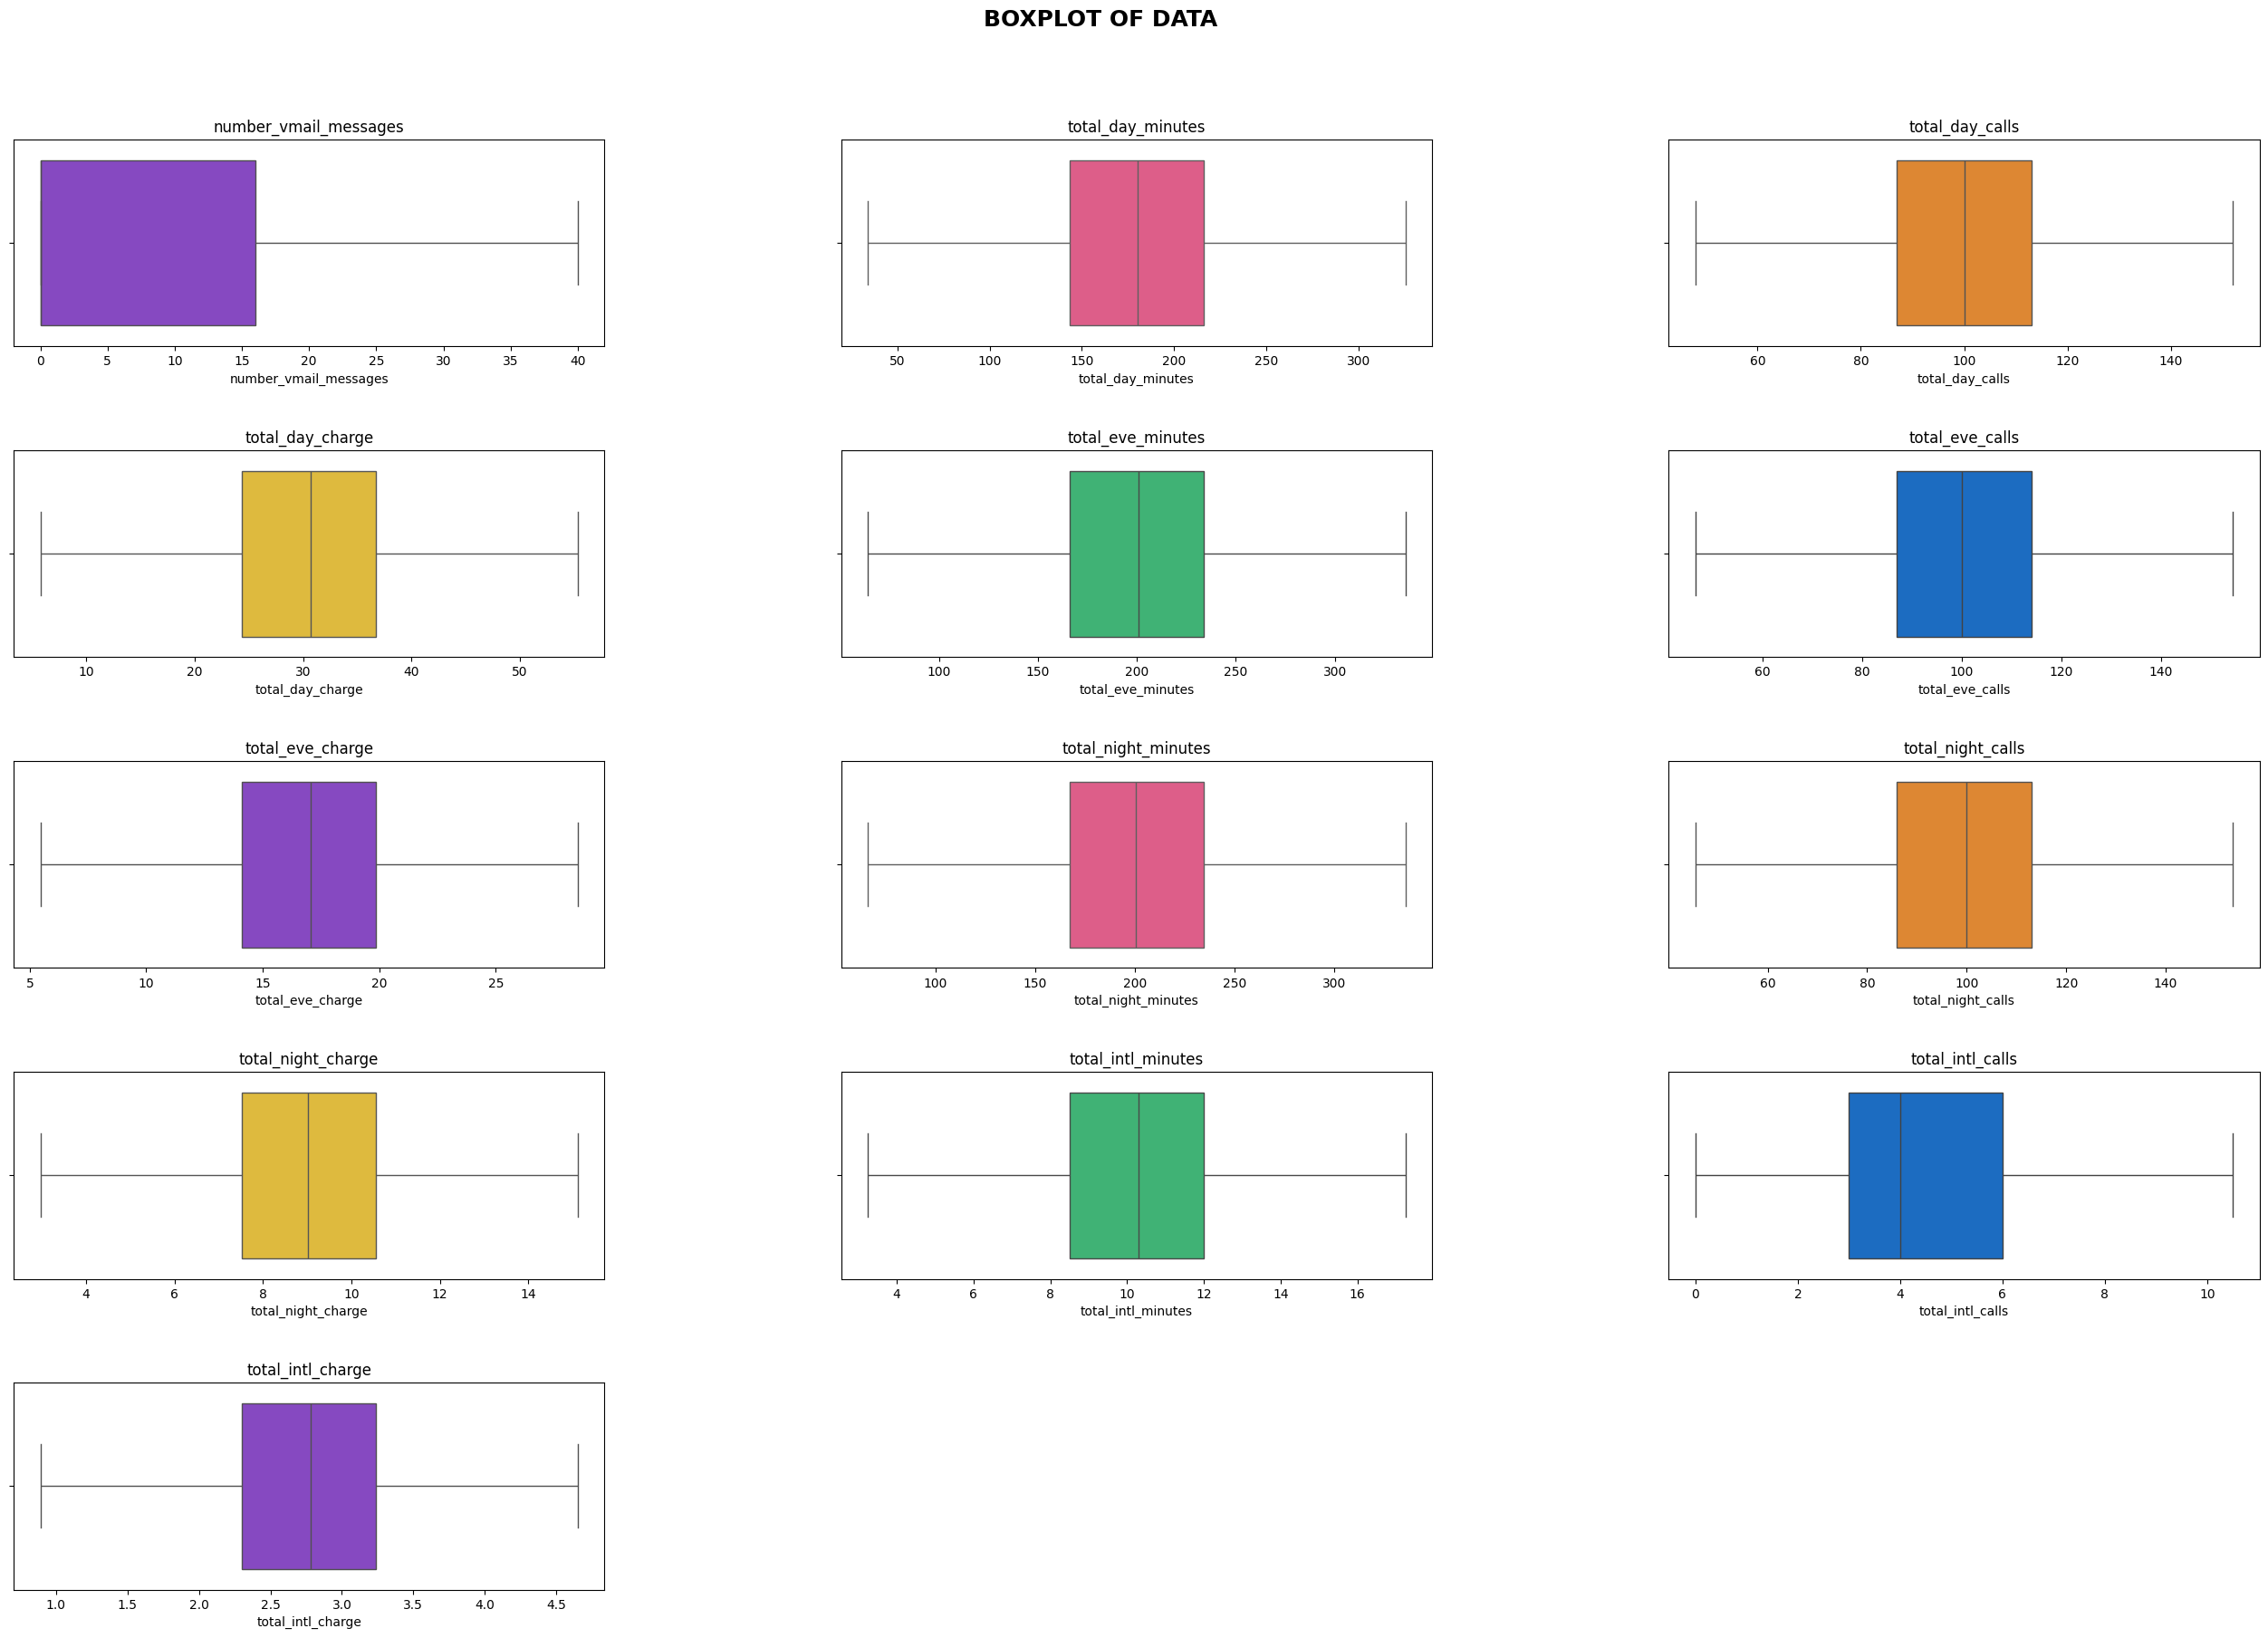

In [ ]:
for col in Num_cols:
    train_df[col] = np.where(
        train_df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            train_df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            train_df[col]
        )
    )

#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i ,col in enumerate(Num_cols):
    ax1 = fig.add_subplot(6,3, i+1)
    ax1 = sns.boxplot(data = train_df, x=col ,color = colours[i])

    ax1.set_title(f'{col}',)
    ax1.set_xlabel(f'{col}',)

# Preparing Data

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop("churn", axis=1)
y = train_df['churn']

print(f"X shape: {X.shape} \ny shape: {y.shape}")
X.columns

X shape: (4250, 19) 
y shape: (4250,)


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
# # Config 1

# X["international_plan"] = X["international_plan"].replace({'yes': 1, 'no': 0})
# X["voice_mail_plan"] = X["voice_mail_plan"].replace({'yes': 1, 'no': 0})

# X['total_minutes'] = X['total_day_minutes'] + X['total_eve_minutes'] + X['total_night_minutes']
# X['total_calls'] = X['total_day_calls'] + X['total_eve_calls'] + X['total_night_calls']
# # X['total_charge']

# to_drop = ['state', 'area_code', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
# X = X.drop(to_drop, axis=1)
# y = y.replace({'yes': 1, 'no': 0})
# X.shape

In [ ]:
# Config 2

X["international_plan"] = X["international_plan"].replace({'yes': 1, 'no': 0})
X["voice_mail_plan"] = X["voice_mail_plan"].replace({'yes': 1, 'no': 0})

X['total_minutes'] = X['total_day_minutes'] + X['total_eve_minutes'] + X['total_night_minutes']
X['total_calls'] = X['total_day_calls'] + X['total_eve_calls'] + X['total_night_calls']

to_drop = ['state', 'area_code', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls']
X = X.drop(to_drop, axis=1)
y = y.replace({'yes': 1, 'no': 0})
X.shape

<ipython-input-33-24468703e102>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["international_plan"] = X["international_plan"].replace({'yes': 1, 'no': 0})
<ipython-input-33-24468703e102>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["voice_mail_plan"] = X["voice_mail_plan"].replace({'yes': 1, 'no': 0})
<ipython-input-33-24468703e102>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To

(4250, 13)

In [ ]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls
0,107,0,1,26.0,27.47,16.620,11.45,13.7,3.0,3.70,1,611.50,329.0
1,137,0,0,0.0,41.38,10.300,7.32,12.2,5.0,3.29,0,527.20,328.0
2,84,1,0,0.0,50.90,5.455,8.86,6.6,7.0,1.78,2,560.45,248.0
3,75,1,0,0.0,28.34,12.610,8.41,10.1,3.0,2.73,3,501.90,356.0
4,121,0,1,24.0,37.09,28.515,9.57,7.5,7.0,2.03,3,766.35,314.0


In [ ]:
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3400, 13)
X_test shape: (850, 13)
y_train shape: (3400,)
y_test shape: (850,)


# Modeling

## Experimental models with LazyClassifer

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import lightgbm as lgb

clf_models = {
    "LGBMClassifier": lgb.LGBMClassifier(),
    "BaggingClassifier": BaggingClassifier(estimator=None, random_state=89),
    "RandomForest": RandomForestClassifier(random_state=89),
    "LogisticRegression": LogisticRegression(random_state=89)
}

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)


 97%|█████████▋| 31/32 [00:12<00:00,  2.77it/s]

[LightGBM] [Info] Number of positive: 485, number of negative: 2915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1715
[LightGBM] [Info] Number of data points in the train set: 3400, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142647 -> initscore=-1.793476
[LightGBM] [Info] Start training from score -1.793476


100%|██████████| 32/32 [00:12<00:00,  2.50it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.87,0.87,0.96,0.44
RandomForestClassifier,0.96,0.87,0.87,0.96,2.86
BaggingClassifier,0.96,0.86,0.86,0.96,0.72
DecisionTreeClassifier,0.93,0.84,0.84,0.93,0.11
ExtraTreesClassifier,0.95,0.84,0.84,0.95,0.73
SVC,0.95,0.83,0.83,0.94,0.67
NearestCentroid,0.76,0.75,0.75,0.79,0.09
QuadraticDiscriminantAnalysis,0.89,0.74,0.74,0.89,0.13
KNeighborsClassifier,0.92,0.73,0.73,0.91,0.28


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.87,0.87,0.96,0.44
RandomForestClassifier,0.96,0.87,0.87,0.96,2.86
BaggingClassifier,0.96,0.86,0.86,0.96,0.72
DecisionTreeClassifier,0.93,0.84,0.84,0.93,0.11
ExtraTreesClassifier,0.95,0.84,0.84,0.95,0.73
SVC,0.95,0.83,0.83,0.94,0.67
NearestCentroid,0.76,0.75,0.75,0.79,0.09
QuadraticDiscriminantAnalysis,0.89,0.74,0.74,0.89,0.13
KNeighborsClassifier,0.92,0.73,0.73,0.91,0.28


## Doing on actual models

In [ ]:
model_list = []
accuracy_list = []
precision_list = []
f1_score_list = []
recall_list = []
cross_val_score_list = []

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

def model_scoring(X_train, y_train, X_test, y_test, y_test_pred, model, model_name):
  # TODO: compute score for each metrics
  accuracy = accuracy_score(y_test_pred, y_test)
  precision = precision_score(y_test_pred, y_test)
  f1 = f1_score(y_test_pred, y_test)
  recall = recall_score(y_test_pred, y_test)
  cross_validation_score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()

  # TODO: append the score to predefined lists
  model_list.append(model_name)
  accuracy_list.append(accuracy)
  precision_list.append(precision)
  f1_score_list.append(f1)
  recall_list.append(recall)
  cross_val_score_list.append(cross_validation_score)


[LightGBM] [Info] Number of positive: 485, number of negative: 2915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1708
[LightGBM] [Info] Number of data points in the train set: 3400, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142647 -> initscore=-1.793476
[LightGBM] [Info] Start training from score -1.793476
Score from test set prediction: 95.65 
Score from train set prediction: 100.00 
[LightGBM] [Info] Number of positive: 539, number of negative: 3286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1723
[LightGBM] [Info] Number of data point

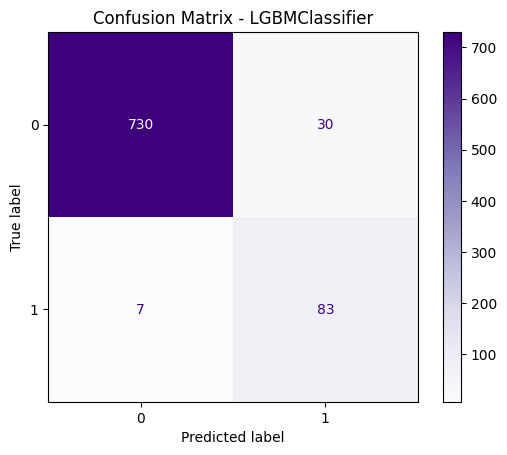

AUC: 0.91


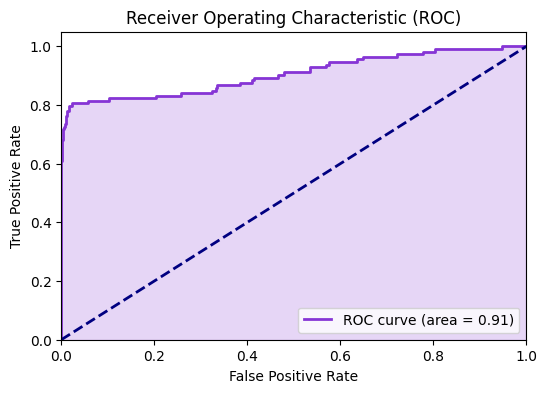

In [ ]:
# LGBM clf

lgbm = clf_models["LGBMClassifier"]
lgbm.fit(X_train, y_train)
y_pred_test = lgbm.predict(X_test)
print(f"Score from test set prediction: {accuracy_score(y_pred_test, y_test)*100:.2f} ")

y_pred_train = lgbm.predict(X_train)
print(f"Score from train set prediction: {accuracy_score(y_pred_train, y_train)*100:.2f} ")

model_scoring(X_train, y_train, X_test, y_test, y_pred_test, lgbm, "LGBMClassifier")
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred_test, y_test, labels=lgbm.classes_))
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - LGBMClassifier")
plt.show()



y_pred_prob = lgbm.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='#8635D5', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
# Shading the AUC area
plt.fill_between(fpr, tpr, color='#8635D5', alpha=0.2)
plt.show()

Score from test set prediction: 96.12 
Score from train set prediction: 99.12 


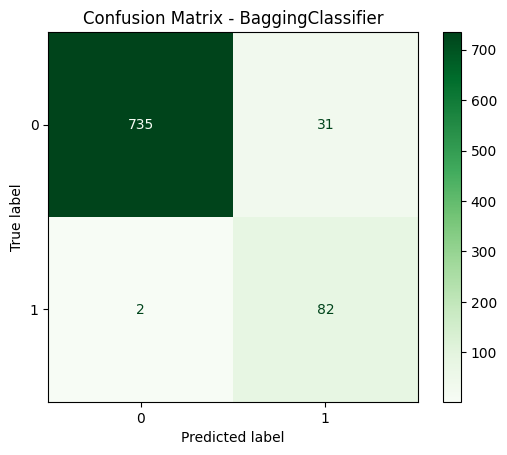

AUC: 0.90


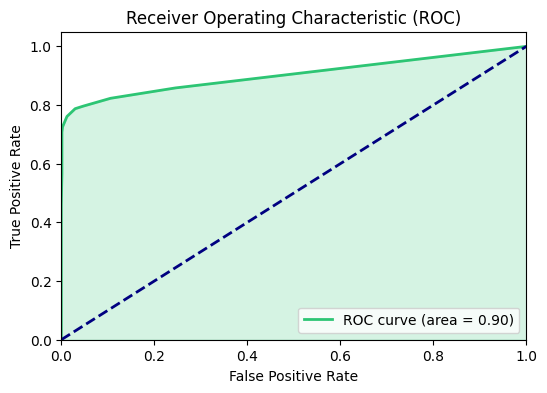

In [ ]:
# Bagging clf

bagging = clf_models["BaggingClassifier"]
bagging.fit(X_train, y_train)
y_pred_test = bagging.predict(X_test)
print(f"Score from test set prediction: {accuracy_score(y_pred_test, y_test)*100:.2f} ")

y_pred_train = bagging.predict(X_train)
print(f"Score from train set prediction: {accuracy_score(y_pred_train, y_train)*100:.2f} ")

model_scoring(X_train, y_train, X_test, y_test, y_pred_test, bagging, "BaggingClassifier")
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred_test, y_test, labels=bagging.classes_))
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - BaggingClassifier")
plt.show()


y_pred_prob = bagging.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='#2DC574', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
# Shading the AUC area
plt.fill_between(fpr, tpr, color='#2DC574', alpha=0.2)
plt.show()

Score from test set prediction: 87.18 
Score from train set prediction: 85.71 


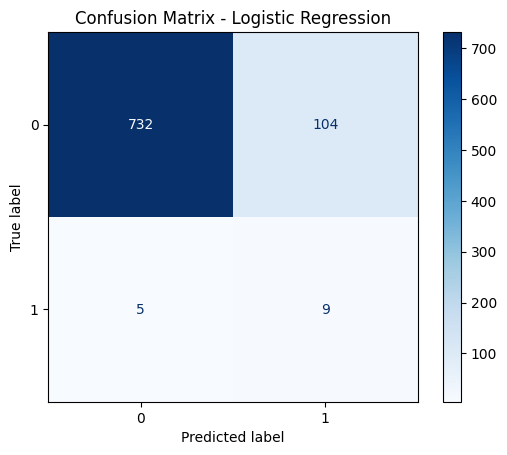

AUC: 0.75


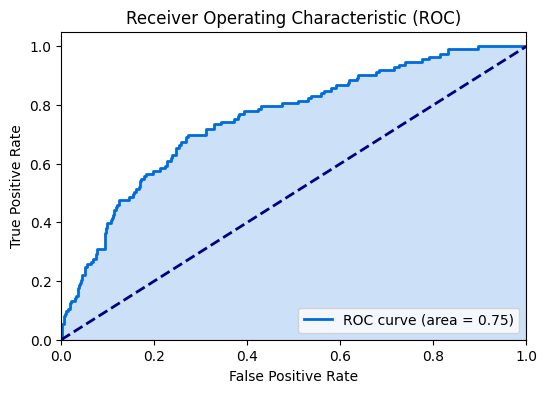

In [ ]:
# Logistic Regression

logistic = clf_models["LogisticRegression"]
logistic.fit(X_train, y_train)
y_pred_test = logistic.predict(X_test)
print(f"Score from test set prediction: {accuracy_score(y_pred_test, y_test)*100:.2f} ")

y_pred_train = logistic.predict(X_train)
print(f"Score from train set prediction: {accuracy_score(y_pred_train, y_train)*100:.2f} ")

model_scoring(X_train, y_train, X_test, y_test, y_pred_test, logistic, "LogisticRegression")
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred_test, y_test, labels=logistic.classes_))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


y_pred_prob = logistic.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='#006CDC', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
# Shading the AUC area
plt.fill_between(fpr, tpr, color='#006CDC', alpha=0.2)
plt.show()

Score from test set prediction: 96.00 
Score from train set prediction: 100.00 


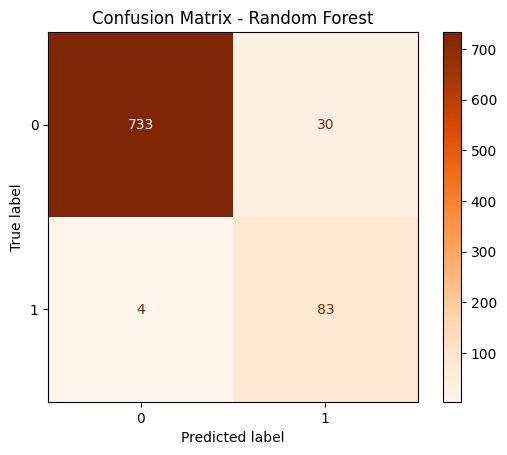

AUC: 0.90


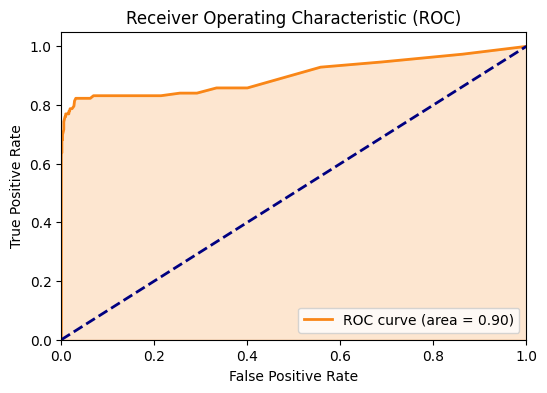

In [ ]:
# Random forest

rf = clf_models["RandomForest"]
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
print(f"Score from test set prediction: {accuracy_score(y_pred_test, y_test)*100:.2f} ")

y_pred_train = rf.predict(X_train)
print(f"Score from train set prediction: {accuracy_score(y_pred_train, y_train)*100:.2f} ")

model_scoring(X_train, y_train, X_test, y_test, y_pred_test, rf, "RandomForest")
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred_test, y_test, labels=rf.classes_))
disp.plot(cmap= 'Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.show()

y_pred_prob = rf.predict_proba(X_test)[:, 1]
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='#F98617', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
# Shading the AUC area
plt.fill_between(fpr, tpr, color='#F98617', alpha=0.2)
plt.show()

# Evaluation

In [ ]:
print(f"model_list: {model_list}")
print(f"accuracy_list: {accuracy_list}")
print(f"precision_list: {precision_list}")
print(f"f1_score_list: {f1_score_list}")
print(f"recall_list: {recall_list}")
print(f"cross_val_score_list: {cross_val_score_list}")

model_list: ['LGBMClassifier', 'BaggingClassifier', 'LogisticRegression', 'RandomForest']
accuracy_list: [0.9564705882352941, 0.9611764705882353, 0.8717647058823529, 0.96]
precision_list: [0.7345132743362832, 0.7256637168141593, 0.07964601769911504, 0.7345132743362832]
f1_score_list: [0.8177339901477833, 0.8324873096446701, 0.14173228346456693, 0.83]
recall_list: [0.9222222222222223, 0.9761904761904762, 0.6428571428571429, 0.9540229885057471]
cross_val_score_list: [0.9661176470588236, 0.9576470588235294, 0.8585882352941177, 0.9625882352941177]


In [ ]:
dict = {
    'Model': model_list,
    'Accuracy': accuracy_list ,
    'Precision': precision_list ,
    'f1_score': f1_score_list ,
    'Recall': recall_list ,
    'Cross_Val_Score': cross_val_score_list
    }
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df

,Model,Accuracy,Precision,f1_score,Recall,Cross_Val_Score
1,BaggingClassifier,0.96,0.73,0.83,0.98,0.96
3,RandomForest,0.96,0.73,0.83,0.95,0.96
0,LGBMClassifier,0.96,0.73,0.82,0.92,0.97
2,LogisticRegression,0.87,0.08,0.14,0.64,0.86


# Submission

In [ ]:
from google.colab import auth
auth.authenticate_user()
!git config --global user.name "Pcrp-99"
!git config --global user.email "dewzpcrp@gmail.com"


In [ ]:
!git clone https://github.com/Pcrp-99/Customer_churn_prediction.git

Cloning into 'Customer_churn_prediction'...


In [ ]:
!ls "/content/drive/MyDrive/Techscoop_projects/Machine_learning_model(python)/"


 customer_churn_prediction	  new-techscoop-customer-churn-prediction-assignment
'linear regression_test1.ipynb'


In [ ]:
!mv "/content/drive/MyDrive/Techscoop_projects/Machine_learning_model(python)/new-techscoop-customer-churn-prediction-assignment" /content/Customer_churn_prediction/

In [ ]:
!ls /content/Customer_churn_prediction/


new-techscoop-customer-churn-prediction-assignment


In [ ]:
%cd /content/Customer_churn_prediction
!git add .
!git commit -m "Added Customer Churn Prediction project"
!git push origin main


/content/Customer_churn_prediction
[main (root-commit) b5e15c2] Added Customer Churn Prediction project
 1 file changed, 1 insertion(+)
 create mode 100644 new-techscoop-customer-churn-prediction-assignment
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git push origin main


Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 1.13 MiB | 2.54 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/Pcrp-99/Customer_churn_prediction.git
 * [new branch]      main -> main


cat: '/content/drive/MyDrive/Techscoop_projects/Machine_learning_model(python)/new_techscoop_customer_churn_prediction_assignment.ipynb': No such file or directory
